In [26]:
import pandas as pd
from sqlalchemy import create_engine

#there's a / in a colum name which makes selecting the columns in this thing a pita
csv_database = create_engine('sqlite:///csv_database.db')
df = pd.read_sql_query('SELECT *, strftime("%Y",DateofTransfer)as Year FROM "table" WHERE Cast(Year as int)== 2006 LIMIT 400', csv_database)

#print(df)
#print(df.iloc[3])
print(df.loc[:,['Price','District','DateofTransfer']])
#WHERE date(DateofTransfer) == date(1995-12-21)

       Price                    District    DateofTransfer
0     249950                    ASHFIELD  2006-01-27 00:00
1     304780                   ISLINGTON  2006-11-28 00:00
2     150000           STRATFORD-ON-AVON  2006-08-02 00:00
3     124000                     GEDLING  2006-06-09 00:00
4     118000                     CARDIFF  2006-12-08 00:00
5     117000                    COVENTRY  2006-04-06 00:00
6     119950                  MANCHESTER  2006-07-31 00:00
7     217000                    LEWISHAM  2006-03-10 00:00
8     350000              SOUTH KESTEVEN  2006-06-05 00:00
9     165995                       RUGBY  2006-02-06 00:00
10    146000                      MERTON  2006-04-10 00:00
11    140000                      EXETER  2006-03-17 00:00
12    125000                    TRAFFORD  2006-10-03 00:00
13    110000  CITY OF KINGSTON UPON HULL  2006-12-20 00:00
14    360000              NORTH TYNESIDE  2006-01-26 00:00
15    139000                   LIVERPOOL  2006-09-21 00:

In [210]:
#print(df.loc[:,['Town/City','District']])

In [5]:
import pickle
geolocations = pickle.load( open( "cities.pkl", "rb" ) )


In [27]:
locations=df.iloc[:,7]
plotdata=locations.map(geolocations).tolist()
fplotdata=list(filter(lambda x:type(x)==tuple,plotdata))
print(len(plotdata))
print(len(fplotdata)-len(plotdata))

400
-8


In [10]:
#locations[15]
#list(dict(fplotdata).values())

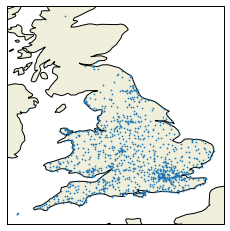

In [24]:

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
ax.add_feature(land_50m)
ax.scatter(list(dict(fplotdata).values()),list(dict(fplotdata).keys()),s=0.5, zorder=10)

#plt.show()

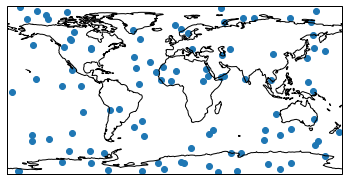

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

np.random.seed(1)
x = 360 * np.random.rand(100)
y = 180 * np.random.rand(100) - 90

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.scatter(x, y)

lon = x
lat = y

NameError: name 'lon' is not defined

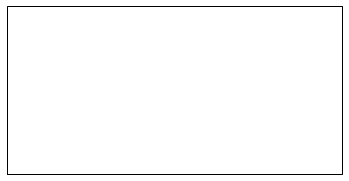

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
ax.scatter(lon, lat)
ax.coastlines()
